In [ ]:
import idle_vampires 
import gymnasium as gym
import numpy as np
import skimage
import matplotlib.pyplot as plt
import idle_vampires.envs
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize


env = idle_vampires.envs.VampireWorldEnv(render_mode=None, num_enemies=5, movement='stick')
env = DummyVecEnv([lambda: env])
#env = VecNormalize(env)
obs=env.reset()

In [29]:
action = env.action_space.sample()

In [ ]:
np.linspace(0, )

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.80999660e-12 7.72248931e-12 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.38405844e-01 0.00000000e+00 0.00000000e+00]


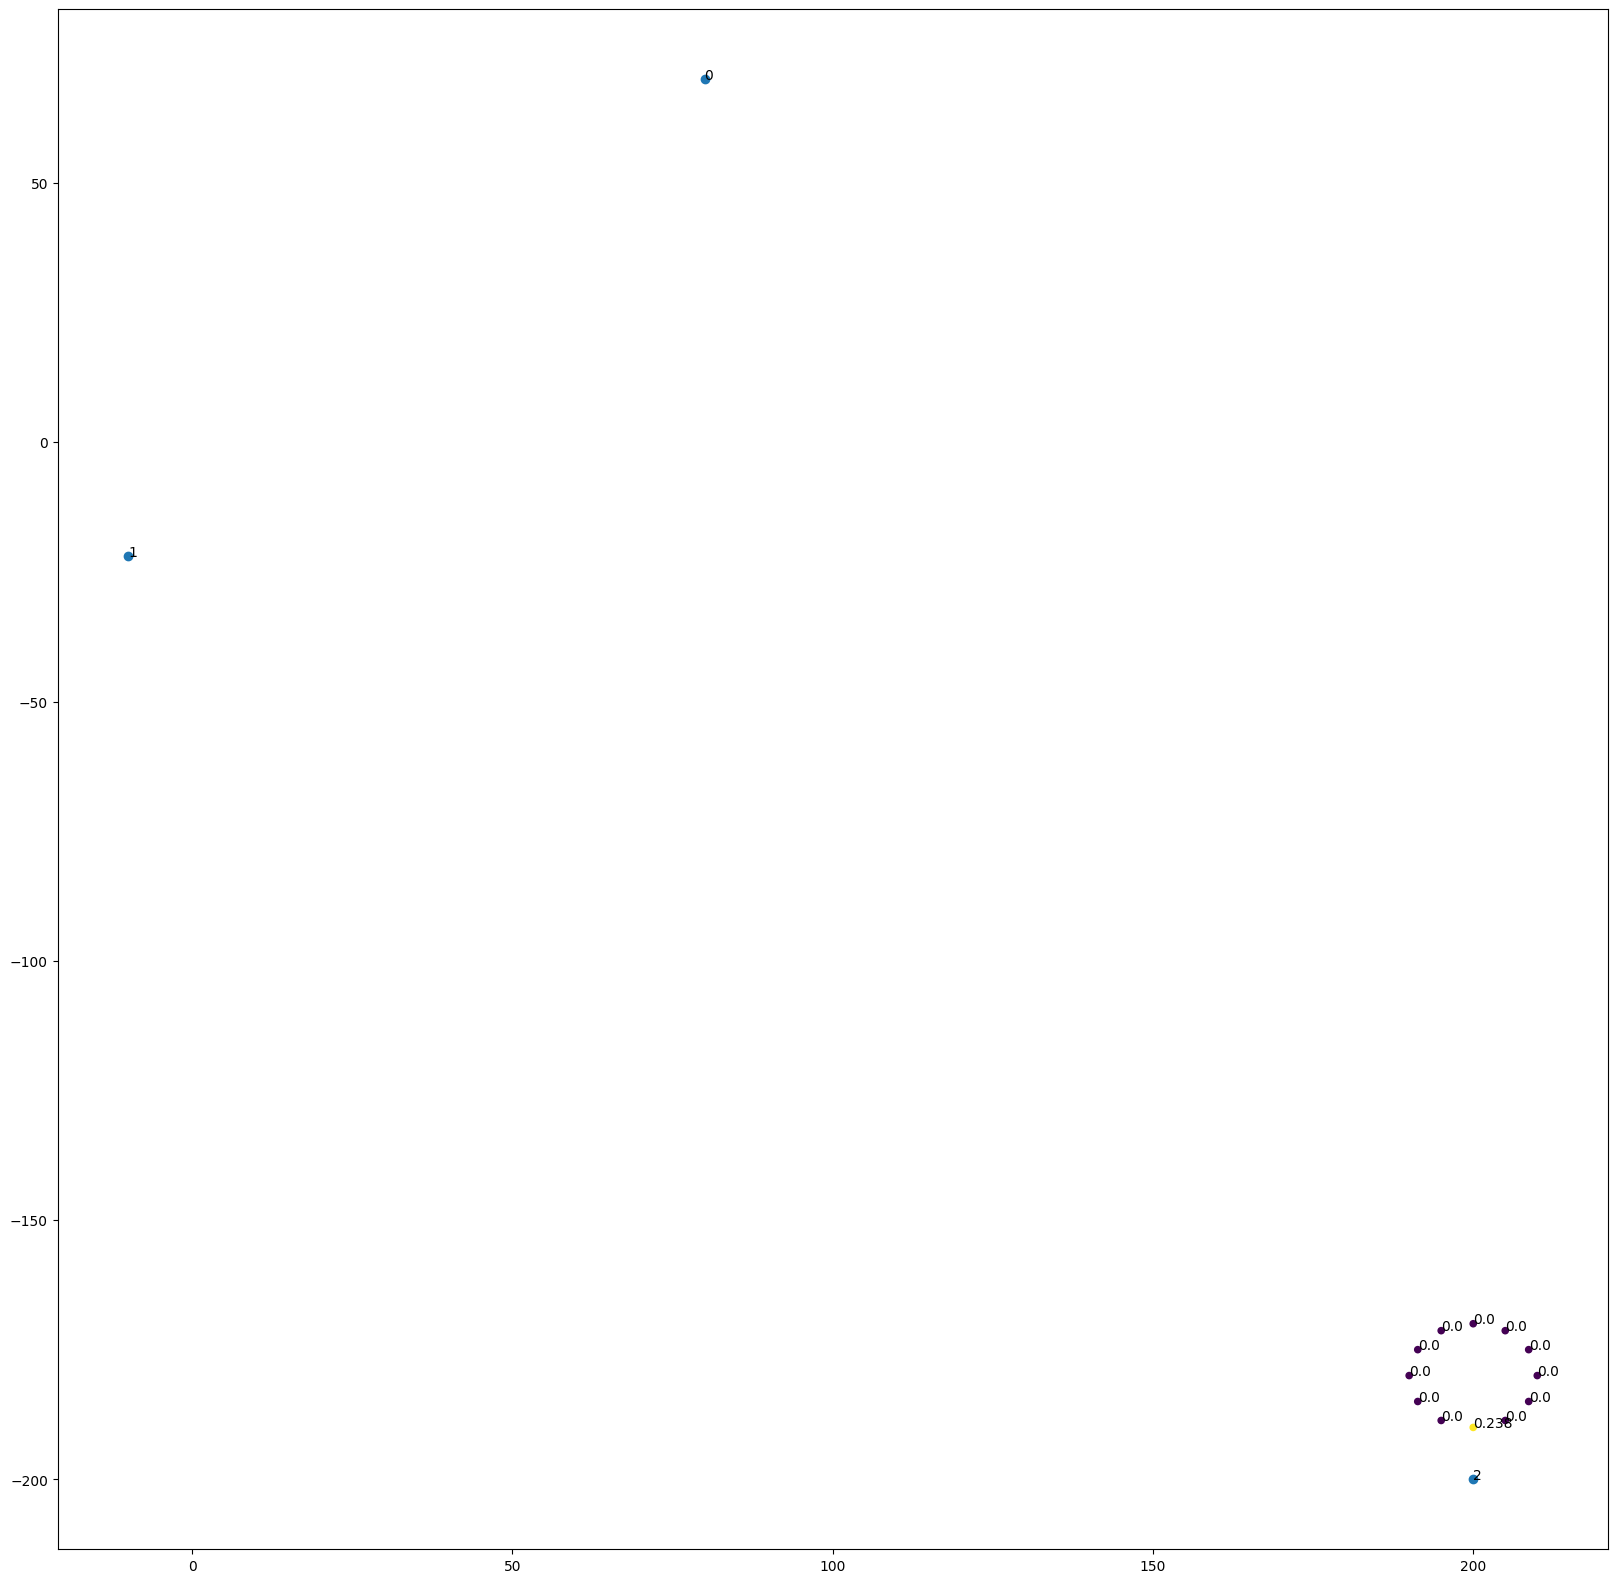

In [262]:
n_dir = 12
pos = np.array([200,-180])
directions = pos+np.array([[np.cos(x)*10, np.sin(x)*10] for x in np.linspace(0, np.arcsin(1)*4-np.arcsin(1)*4/n_dir, n_dir)])
colors = np.array([0 for _ in range(n_dir)]).astype(float)
p0=np.array([[80.0, 70.0],[-10, -22], [200,-200]])
indices = np.argmax(directions@(p0-pos).T, axis=0)
colors[indices] = 1
for i, ind in enumerate(indices):
    colors[ind] -= np.tanh(np.linalg.norm((p0[i]-pos))/20)
print(colors)
plt.figure(figsize=(20,20))
plt.scatter(x=directions[:,0], y=directions[:,1], c=colors, s=20)
for i,d in enumerate(directions):
    plt.text(d[0], d[1], f"{colors[i].round(3)}")
plt.scatter(p0[:,0], p0[:,1])
for i,p in enumerate(p0):
    plt.text(p0[i][0], p0[i][1], f"{i}")


In [230]:
directions

array([[ 4.00000000e+00,  0.00000000e+00],
       [ 3.46410162e+00,  2.00000000e+00],
       [ 2.00000000e+00,  3.46410162e+00],
       [ 2.44929360e-16,  4.00000000e+00],
       [-2.00000000e+00,  3.46410162e+00],
       [-3.46410162e+00,  2.00000000e+00],
       [-4.00000000e+00,  4.89858720e-16],
       [-3.46410162e+00, -2.00000000e+00],
       [-2.00000000e+00, -3.46410162e+00],
       [-7.34788079e-16, -4.00000000e+00],
       [ 2.00000000e+00, -3.46410162e+00],
       [ 3.46410162e+00, -2.00000000e+00]])

In [193]:
p0

array([[ 80.,  70.],
       [ 90.,  30.],
       [120.,  90.],
       [-10., -22.]])

In [195]:
1-np.tanh(np.linalg.norm(p0, axis=1)/100)

array([0.21318509, 0.26081363, 0.09485175, 0.76293606])

In [241]:
np.linalg.norm([0,0]-directions, axis=1)

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [27]:
rewards = []
for i in range(512):
    row = []
    for j in range(512):
        row.append(env.reward_for_place(np.array([i,j])))
    rewards.append(row)

AttributeError: 'DummyVecEnv' object has no attribute 'reward_for_place'

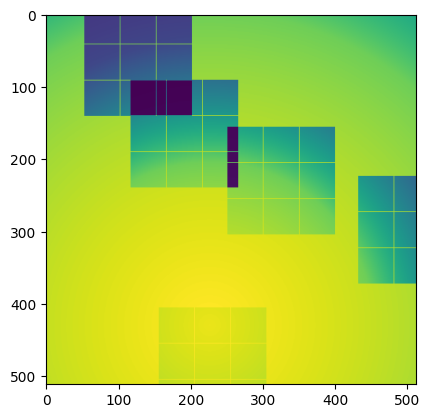

In [6]:
plt.imshow(np.array(rewards),  norm='symlog')